## 2. Sparse Logistic Regression: Experiment

In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

### Reading and processing data

In [2]:
data = loadmat("ad_data.mat",)

In [3]:
X_train, y_train, X_test, y_test = data['X_train'],data['y_train'].reshape(-1),data['X_test'],data['y_test'].reshape(-1)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, y_test.shape

((172, 116), (74,))

### Sparse Logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
par = [1e-8, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
aucs = []
zero_features = []

for p in par:
    # Please note that in sklearn, lower 'C' value means higher regularization.
    model = LogisticRegression(penalty='l1', solver='saga', C=1/p, max_iter=5000, tol=1e-4)
    model.fit(X_train, y_train)
    yp = model.predict(X_test)
    
    auc = roc_auc_score(y_test, yp)
    zeroed = (model.coef_==0).sum()
    aucs.append(auc); zero_features.append(zeroed)
    
    print(f"{p=}, {auc=:.4f}, {zeroed=}")
    print()

p=1e-08, auc=0.5742, zeroed=0

p=0.01, auc=0.5833, zeroed=3

p=0.1, auc=0.5488, zeroed=23

p=0.2, auc=0.5488, zeroed=34

p=0.3, auc=0.5579, zeroed=38

p=0.4, auc=0.5751, zeroed=43

p=0.5, auc=0.5751, zeroed=48

p=0.6, auc=0.5923, zeroed=49

p=0.7, auc=0.5923, zeroed=51

p=0.8, auc=0.6014, zeroed=54

p=0.9, auc=0.5923, zeroed=56

p=1, auc=0.5923, zeroed=60



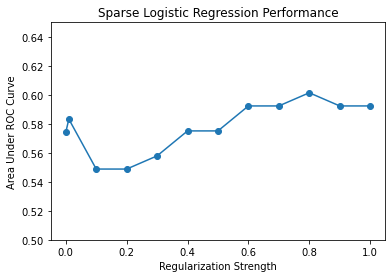

In [6]:
plt.title("Sparse Logistic Regression Performance")
plt.xlabel("Regularization Strength")
plt.ylabel("Area Under ROC Curve")
plt.ylim(.5,.65)
plt.plot(par, aucs, '-o');
plt.savefig("pvauc.png");

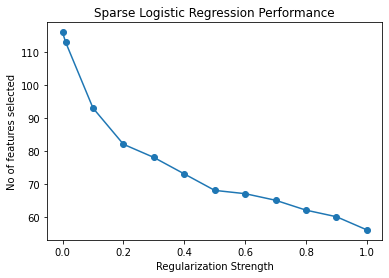

In [7]:
non_zero_features = X_train.shape[1] - np.array(zero_features)

plt.title("Sparse Logistic Regression Performance")
plt.xlabel("Regularization Strength")
plt.ylabel("No of features selected")
plt.plot(par,non_zero_features , '-o');
plt.savefig("pvz.png");